In [134]:
import pandas as pd

url="/content/bestsellers with categories.csv"
df = pd.read_csv(url)

In [135]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [136]:
df.shape

(550, 7)

Датасет зберігає 550 книг.

In [137]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [138]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Пропусків у змінних немає.

In [139]:
df["genre"].nunique()

2

In [140]:
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

Унікальні жанри : ['Non Fiction', 'Fiction']


In [141]:
import matplotlib.pyplot as plt

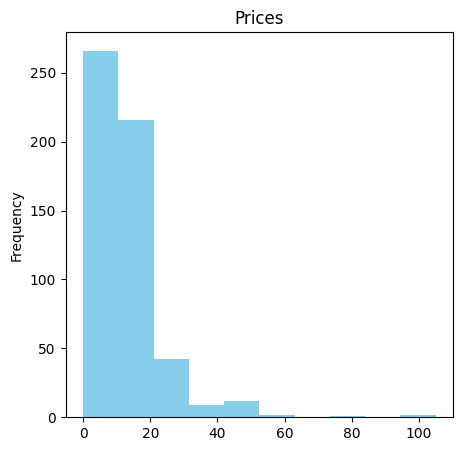

In [142]:
plt.figure(figsize=(5, 5))
df["price"].plot(kind='hist', color='skyblue', title = "Prices")
plt.show()

In [143]:
print("Максимальна ціна:", df["price"].max())
print("Мінімальна ціна:", df["price"].min())
print("Середня ціна:", df["price"].mean())
print("Медіана:", df["price"].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіана: 11.0


In [144]:
print("Найвищий рейтинг у датасеті", df["user_rating"].max())

Найвищий рейтинг у датасеті 4.9


In [145]:
print("Скільки книг мають найвищий рейтинг:", df['user_rating'].value_counts()[4.9])

Скільки книг мають найвищий рейтинг: 52


In [146]:
max_rev = df['reviews'].max()
max_rev

87841

In [147]:
print("Книга з найбільшою кількістю відгуків: ", df.sort_values(by ="reviews",ascending=False).iloc[0])

Книга з найбільшою кількістю відгуків:  name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [148]:
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)
top2015 = df[df['year'] ==2015].sort_values(by = 'user_rating', ascending=False)[:50]
print("Найдорожча книга із тих що потрапили до Топ-50 у 2015 році", top2015.loc[top2015['price'].idxmax()]["name"])

Найдорожча книга із тих що потрапили до Топ-50 у 2015 році Publication Manual of the American Psychological Association, 6th Edition


In [149]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році
top2010 = df[(df['year']==2010) & (df['genre']== "Fiction")].sort_values(by = "user_rating").shape[0]
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році --", top2010)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році -- 20


In [150]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
top = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].sort_values(by='user_rating')
top_count = top.shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:  {top_count}, {top}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:  1,                                                   name       author  \
187  Jesus Calling: Enjoying Peace in His Presence ...  Sarah Young   

     user_rating  reviews  price  year        genre  
187          4.9    19576      8  2011  Non Fiction  


In [151]:
cheap_2015 =  df[(df['year']==2015) & (df['price']< 8)].sort_values(by = 'price', ascending=True)
print("Остання у списку відсортованого за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів :", cheap_2015.tail(1))

Остання у списку відсортованого за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів :                                       name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [152]:
df[["genre","price"]].groupby("genre").agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [153]:
print('Максимальна ціна для жанру Fiction:' , 82)
print('Мінімальна ціна для жанру Fiction:' , 0)
print('Мінімальна ціна для жанру Non Fiction:' , 0)
print('Максимальна ціна для жанру Non Fiction:' , 105)

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Мінімальна ціна для жанру Non Fiction: 0
Максимальна ціна для жанру Non Fiction: 105


In [154]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
df_books = df[["name","author"]].groupby("author").agg("count")
df_books.columns = ["count_books"]
df_books["count_books"].sort_values(ascending=False).head()

author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Name: count_books, dtype: int64

In [155]:
print(" Якої розмірності вийшла таблиця? : ", df_books.shape)

 Якої розмірності вийшла таблиця? :  (248, 1)


In [156]:
print("Який автор має найбільше книг?: ", df_books.idxmax().iloc[0])

Який автор має найбільше книг?:  Jeff Kinney


In [157]:
print("Скільки книг цього автора?: ", df_books.loc[df_books.idxmax()].iloc[0])

Скільки книг цього автора?:  count_books    12
Name: Jeff Kinney, dtype: int64


In [158]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
author_avg = df[["author","user_rating"]].groupby("author").agg("mean").sort_values(by = "user_rating")
author_avg

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


In [159]:
print("У якого автора середній рейтинг мінімальний? :", author_avg.idxmin())

У якого автора середній рейтинг мінімальний? : user_rating    Donna Tartt
dtype: object


In [160]:
print("У якого автора середній рейтинг? :", author_avg.min().iloc[0])

У якого автора середній рейтинг? : 3.9


In [161]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df_t = pd.concat([df_books, author_avg], axis =1)
df_t.head()

,count_books,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


In [162]:
df_sort = df_t.sort_values(['count_books', "user_rating"], ascending = True)
df_sort.head(3)

,count_books,user_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1


In [163]:
print("Який автор перший у списку? :", df_sort.iloc[0])

Який автор перший у списку? : count_books    1.0
user_rating    4.0
Name: Muriel Barbery, dtype: float64


Візуалізація

In [164]:
import matplotlib.pyplot as plt

In [165]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


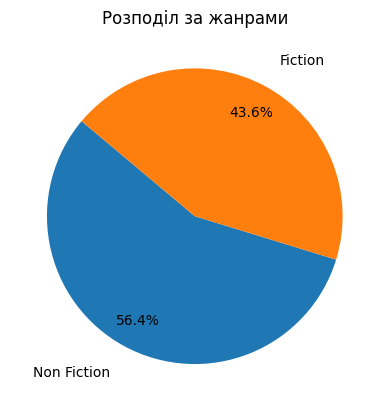

In [166]:
genres_counts = df['genre'].value_counts()
plt.pie(genres_counts, labels=genres_counts.index, autopct='%1.1f%%', startangle=140,  labeldistance=1.2, pctdistance=0.8)
plt.title('Розподіл за жанрами')
plt.show()

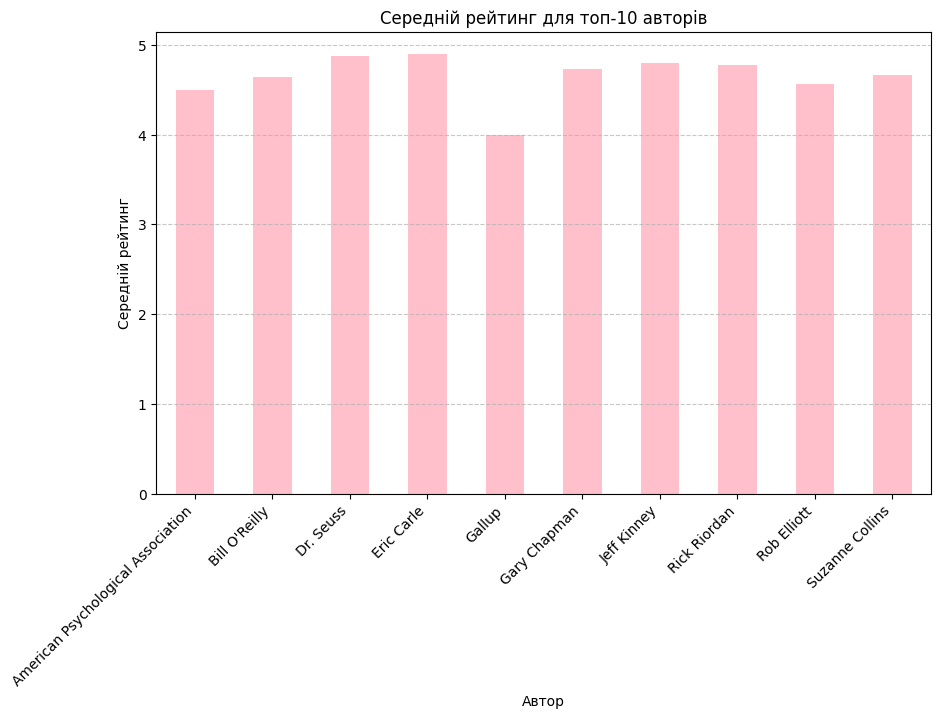

In [167]:
#Середній рейтинг авторів з найбільшою кількістю книг
df_books = df[["name","author"]].groupby("author").agg("count")
df_books.columns = ["count_books"]
top_authors = df_books.sort_values(by='count_books', ascending=False).head(10)
top_authors_data = df[df['author'].isin(top_authors.index)]
average_rating_by_author = top_authors_data.groupby('author')['user_rating'].mean()

plt.figure(figsize=(10, 6))
average_rating_by_author.plot(kind='bar', color='pink')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Середній рейтинг для топ-10 авторів')
plt.xlabel('Автор')
plt.ylabel('Середній рейтинг')
plt.xticks(rotation=45, ha='right')
plt.show()

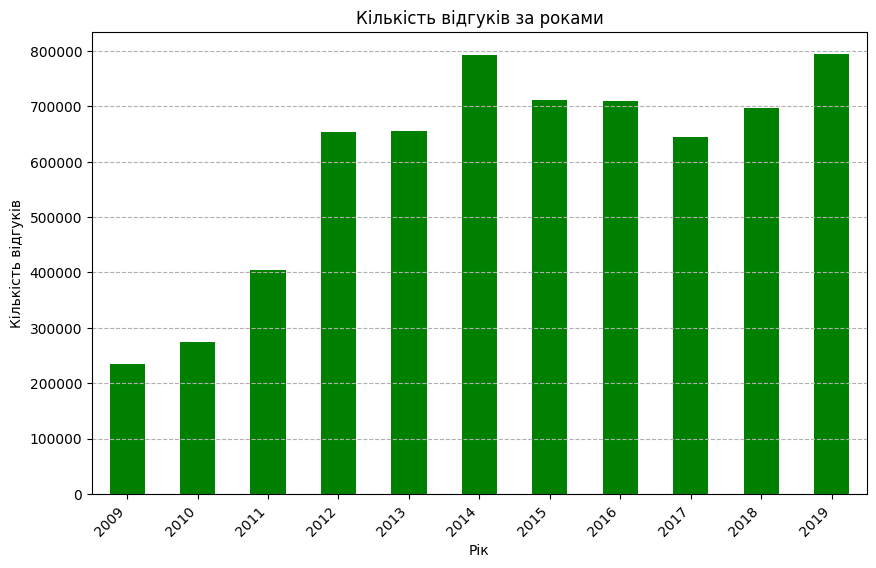

In [168]:
reviews_per_year = df.groupby('year')['reviews'].sum()
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar', color='green')
plt.title('Кількість відгуків за роками')
plt.grid(axis= 'y', linestyle='--')
plt.xlabel('Рік')
plt.ylabel('Кількість відгуків')
plt.xticks(rotation=45, ha='right')
plt.show()